# Prosper Data Exploration
## by Olamide Emida
Data source: Click [here](https://www.google.com/url?q=https://s3.amazonaws.com/udacity-hosted-downloads/ud651/prosperLoanData.csv&sa=D&ust=1581581520570000)

## Introduction

This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# import the dataset and view the first five rows

prosper = pd.read_csv('/kaggle/input/udacity-prosper-data/prosperLoanData.csv')
prosper.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
# view the shape of the data

prosper.shape

(113937, 81)

In [4]:
# view the general information about the data

prosper.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [5]:
# descriptive statistics for numeric variables

prosper.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


We have 113937 rows and 81 columns.

The following cleaning will be performed to make the data ready for exploration: 

1. Select variables of interest
2. Change data types for the listing creation date column
3. Fill null values in credit grade and prosper rating columns
4. Rename listing category column and create a new average credit score column
5. Delete extraneous columns
6. Update the numeric values in the Listing category column and update the Employment status column
7. Remove null values and
8. Remove duplicate rows

**Create a dataframe with the variables of interest**

In [6]:
# create a dataframe with the variables of interest and view the first five rows

prosper = prosper[['ListingCreationDate', 'CreditGrade', 'Term', 'LoanStatus', 'BorrowerAPR', 
                    'BorrowerRate', 'ProsperRating (Alpha)', 'ListingCategory (numeric)', 
                    'EmploymentStatus', 'EmploymentStatusDuration', 'IsBorrowerHomeowner', 
                    'CurrentlyInGroup', 'CreditScoreRangeLower', 'CreditScoreRangeUpper', 
                    'DebtToIncomeRatio', 'IncomeRange', 'StatedMonthlyIncome', 'LoanOriginalAmount']]
prosper.head()

,ListingCreationDate,CreditGrade,Term,LoanStatus,BorrowerAPR,BorrowerRate,ProsperRating (Alpha),ListingCategory (numeric),EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,CreditScoreRangeLower,CreditScoreRangeUpper,DebtToIncomeRatio,IncomeRange,StatedMonthlyIncome,LoanOriginalAmount
0,2007-08-26 19:09:29.263000000,C,36,Completed,0.16516,0.1580,NaN,0,Self-employed,2.0,True,True,640.0,659.0,0.17,"$25,000-49,999",3083.333333,9425
1,2014-02-27 08:28:07.900000000,NaN,36,Current,0.12016,0.0920,A,2,Employed,44.0,False,False,680.0,699.0,0.18,"$50,000-74,999",6125.000000,10000
2,2007-01-05 15:00:47.090000000,HR,36,Completed,0.28269,0.2750,NaN,0,Not available,NaN,False,True,480.0,499.0,0.06,Not displayed,2083.333333,3001
3,2012-10-22 11:02:35.010000000,NaN,36,Current,0.12528,0.0974,A,16,Employed,113.0,True,False,800.0,819.0,0.15,"$25,000-49,999",2875.000000,10000
4,2013-09-14 18:38:39.097000000,NaN,36,Current,0.24614,0.2085,D,2,Employed,44.0,True,False,680.0,699.0,0.26,"$100,000+",9583.333333,15000


**Change data types**

In [7]:
# convert listing creation date column to datetime data type 

prosper['ListingCreationDate'] = pd.to_datetime(prosper['ListingCreationDate'])

In [8]:
# confirm the change of data type

prosper.dtypes

ListingCreationDate          datetime64[ns]
CreditGrade                          object
Term                                  int64
LoanStatus                           object
BorrowerAPR                         float64
BorrowerRate                        float64
ProsperRating (Alpha)                object
ListingCategory (numeric)             int64
EmploymentStatus                     object
EmploymentStatusDuration            float64
IsBorrowerHomeowner                    bool
CurrentlyInGroup                       bool
CreditScoreRangeLower               float64
CreditScoreRangeUpper               float64
DebtToIncomeRatio                   float64
IncomeRange                          object
StatedMonthlyIncome                 float64
LoanOriginalAmount                    int64
dtype: object

**Fill null values**

Credit grade is applicable for loans created before July 2009 and prosper rating is applicable for loans created after July 2009. Create a new variable (RatingGrade) that combines these two columns into one by filling null values.

In [9]:
# check the count of unique values in credit grade and prosper rating 
#to ensure the values are similar

print(prosper['CreditGrade'].value_counts())
prosper['ProsperRating (Alpha)'].value_counts()

C     5649
D     5153
B     4389
AA    3509
HR    3508
A     3315
E     3289
NC     141
Name: CreditGrade, dtype: int64


C     18345
B     15581
A     14551
D     14274
E      9795
HR     6935
AA     5372
Name: ProsperRating (Alpha), dtype: int64

In [10]:
# Create a new variable (RatingGrade) that combines credit grade and prosper rating columns 
#into one column by filling null values.

prosper['RatingGrade'] = prosper['CreditGrade'].fillna(prosper['ProsperRating (Alpha)'])

In [11]:
# confirm the fill of null values

prosper[['ListingCreationDate', 'CreditGrade', 'ProsperRating (Alpha)', 'RatingGrade']].sample(20)

,ListingCreationDate,CreditGrade,ProsperRating (Alpha),RatingGrade
88193,2011-09-22 15:28:34.133,NaN,C,C
75477,2012-10-19 10:06:41.927,NaN,D,D
54145,2013-11-29 07:59:48.473,NaN,E,E
57255,2013-12-04 14:43:32.443,NaN,D,D
110138,2006-12-18 09:33:02.487,E,NaN,E
34531,2007-09-16 21:53:55.970,HR,NaN,HR
38536,2012-07-03 07:44:02.770,NaN,HR,HR
41222,2012-03-31 13:17:07.900,NaN,AA,AA
64049,2013-06-04 17:39:21.127,NaN,C,C
94340,2007-04-26 19:20:04.047,HR,NaN,HR


**Rename listing category columns and create a new average credit score column**

In [12]:
# rename the listing category column

prosper.rename(columns = {'ListingCategory (numeric)' : 'ListingCategory'}, inplace = True)

# create an average credit score column by using the mean of CreditScoreRangeLower and 
#CreditScoreRangeUpper columns

prosper['CreditScoreAverage'] = (prosper.CreditScoreRangeLower + prosper.CreditScoreRangeUpper)/2

**Delete extraneous columns**

In [13]:
# delete extraneous columns

prosper.drop(['ListingCreationDate', 'CreditGrade', 'ProsperRating (Alpha)', 
               'CreditScoreRangeLower', 'CreditScoreRangeUpper'], 
              axis = 1, inplace = True)

In [14]:
# confirm that the above changes (renaming and deleting of columns) have been made

prosper.head()

,Term,LoanStatus,BorrowerAPR,BorrowerRate,ListingCategory,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,DebtToIncomeRatio,IncomeRange,StatedMonthlyIncome,LoanOriginalAmount,RatingGrade,CreditScoreAverage
0,36,Completed,0.16516,0.1580,0,Self-employed,2.0,True,True,0.17,"$25,000-49,999",3083.333333,9425,C,649.5
1,36,Current,0.12016,0.0920,2,Employed,44.0,False,False,0.18,"$50,000-74,999",6125.000000,10000,A,689.5
2,36,Completed,0.28269,0.2750,0,Not available,NaN,False,True,0.06,Not displayed,2083.333333,3001,HR,489.5
3,36,Current,0.12528,0.0974,16,Employed,113.0,True,False,0.15,"$25,000-49,999",2875.000000,10000,A,809.5
4,36,Current,0.24614,0.2085,2,Employed,44.0,True,False,0.26,"$100,000+",9583.333333,15000,D,689.5


**Update the numeric values in the Listing category column and update the Employment status column**

The category of the listing that the borrower selected when posting their listings are numeric:

0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, <br> 
5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, <br>
11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, <br>
15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans

In [15]:
# view the unique values in the listing category column

prosper['ListingCategory'].value_counts()

1     58308
0     16965
7     10494
2      7433
3      7189
6      2572
4      2395
13     1996
15     1522
18      885
14      876
20      771
19      768
5       756
16      304
11      217
8       199
10       91
9        85
12       59
17       52
Name: ListingCategory, dtype: int64

In [16]:
# update the numeric values in the Listing category column

prosper['ListingCategory'] = prosper['ListingCategory'].astype(str)

category = {'0' : 'Not Available', '1' : 'Debt Consolidation', '2' : 'Home Improvement', 
            '3' : 'Business', '4' : 'Personal Loan', '5' : 'Student Use', '6' : 'Auto', 
            '7' : 'Other', '8' : 'Baby&Adoption', '9' : 'Boat', '10' : 'Cosmetic Procedure', 
            '11' : 'Engagement Ring', '12' : 'Green Loans', '13' : 'Household Expenses', 
            '14' : 'Large Purchases', '15' : 'Medical/Dental', '16' : 'Motorcycle', '17' : 'RV', 
            '18' : 'Taxes', '19' : 'Vacation', '20' : 'Wedding Loans'}

def cat_name(prosper_category): 
    if prosper_category['ListingCategory'] in category.keys():
        cat = category[prosper_category['ListingCategory']]
        return cat
    else:
        return prosper_category['ListingCategory']
        
prosper['ListingCategory'] = prosper.apply(cat_name, axis =1)

In [17]:
# confirm the change of the numeric values

prosper['ListingCategory'].value_counts()

Debt Consolidation    58308
Not Available         16965
Other                 10494
Home Improvement       7433
Business               7189
Auto                   2572
Personal Loan          2395
Household Expenses     1996
Medical/Dental         1522
Taxes                   885
Large Purchases         876
Wedding Loans           771
Vacation                768
Student Use             756
Motorcycle              304
Engagement Ring         217
Baby&Adoption           199
Cosmetic Procedure       91
Boat                     85
Green Loans              59
RV                       52
Name: ListingCategory, dtype: int64

In [18]:
# view the unique values in the Employment status column

prosper['EmploymentStatus'].value_counts()

Employed         67322
Full-time        26355
Self-employed     6134
Not available     5347
Other             3806
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

In [19]:
# Replace full time and part time with employed

prosper['EmploymentStatus'].replace(['Full-time', 'Part-time'], 'Employed', inplace=True)

In [20]:
# confirm the changes made

prosper['EmploymentStatus'].value_counts()

Employed         94765
Self-employed     6134
Not available     5347
Other             3806
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

**Remove null values**

In [21]:
# check for null values in the dataset

prosper.isnull().sum()

Term                           0
LoanStatus                     0
BorrowerAPR                   25
BorrowerRate                   0
ListingCategory                0
EmploymentStatus            2255
EmploymentStatusDuration    7625
IsBorrowerHomeowner            0
CurrentlyInGroup               0
DebtToIncomeRatio           8554
IncomeRange                    0
StatedMonthlyIncome            0
LoanOriginalAmount             0
RatingGrade                  131
CreditScoreAverage           591
dtype: int64

In [22]:
# remove null values

prosper.dropna(inplace = True)

In [23]:
# check the correction made to the null values

prosper.isnull().sum().any()

False

**Remove duplicate rows**

In [24]:
# check for duplicate rows

prosper.duplicated().sum()

789

In [25]:
# delete the duplicated rows

prosper.drop_duplicates(inplace = True)

In [26]:
# confirm the removal of duplicated row

prosper.duplicated().sum()

0

In [27]:
# properties of the cleaned data

prosper.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96979 entries, 0 to 113936
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Term                      96979 non-null  int64  
 1   LoanStatus                96979 non-null  object 
 2   BorrowerAPR               96979 non-null  float64
 3   BorrowerRate              96979 non-null  float64
 4   ListingCategory           96979 non-null  object 
 5   EmploymentStatus          96979 non-null  object 
 6   EmploymentStatusDuration  96979 non-null  float64
 7   IsBorrowerHomeowner       96979 non-null  bool   
 8   CurrentlyInGroup          96979 non-null  bool   
 9   DebtToIncomeRatio         96979 non-null  float64
 10  IncomeRange               96979 non-null  object 
 11  StatedMonthlyIncome       96979 non-null  float64
 12  LoanOriginalAmount        96979 non-null  int64  
 13  RatingGrade               96979 non-null  object 
 14  Credi

### What is the structure of your dataset?

In the cleaned data, there are 96979 loans with 15 features (Term, Loan status, Borrower rate, Listing category, Loan amount, Monthly income, Income range and so on). Most of the variables are numeric, but the Borrower Homeowner and Currently in group are boolean data. And the Rating grade is an ordered variable with the following level:

Low risk --> High risk <br>
Rating grade: AA, A, B, C, D, E, HR

## What is/are the main feature(s) of interest in your dataset?

I'm most interested in figuring out what features affect borrowers' interest rates and loan status outcome.

## What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect that term (loan period), credit rating, debt to income ratio, loan amount, and monthly income will have effect on each borrower's interest rate: the higher the term, loan amount and debt to income ratio, the higher the interest rates and vice versa. While the higher the monthly income and credit rating, the lower the interest rate. The features will also affect the loan status: whether the loan will be defaulted, completed, charged off or cancelled.

## Univariate Exploration

I'll start by looking at the distribution of the main variable of interest: borrower rate.

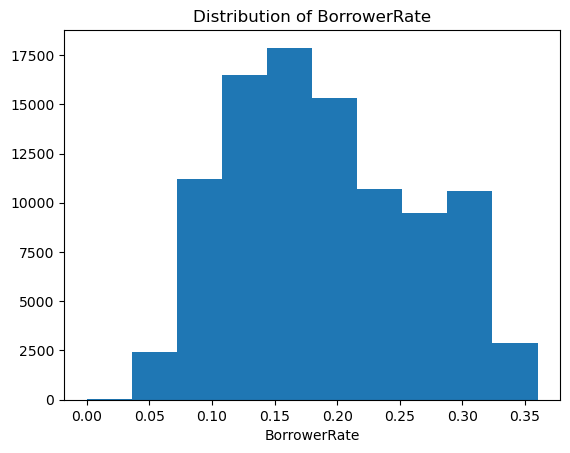

In [28]:
# distribution of the borrower rate (interest rate) in a standard 10 bins

# create a function to plot histograms to avoid repetition of code
def hist_chart(var, bins):
    """Returns a histogram chart"""
    plt.hist(data = prosper, x= var, bins = bins)
    plt.xlabel(var)
    plt.title('Distribution of {}'.format(var))
    
hist_chart('BorrowerRate', 10)

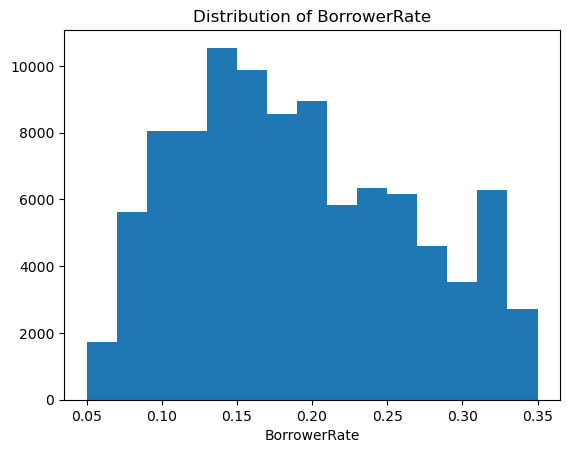

In [29]:
# investigating with a larger number of bins

bin_size = np.arange(0.05, prosper['BorrowerRate'].max(), 0.02)

hist_chart('BorrowerRate', bin_size)

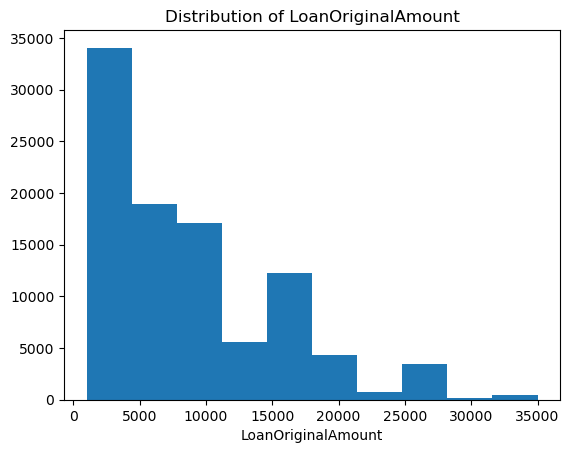

In [30]:
# distribution of the loan amount in a standard 10 bins

hist_chart('LoanOriginalAmount', 10)

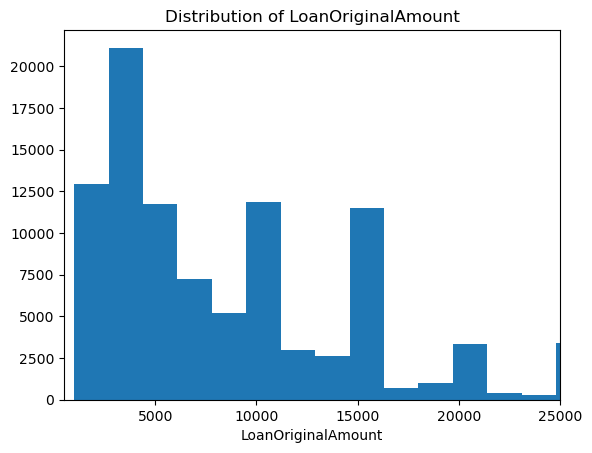

In [31]:
# investigating with a larger number of bins
# limit the axis limit to see the trend clearly

hist_chart('LoanOriginalAmount', 20)
plt.xlim(500, 25000);

The loan amount has a right-tailed distribution. The charts shows Prosper mostly gives out loans with lower amounts around 5000 dollars. There is also increase in frequency for loan amoounts around 10000 and 15000 dollars.

Next up, the second predictor variable of borrower rate and loan status: credit score.

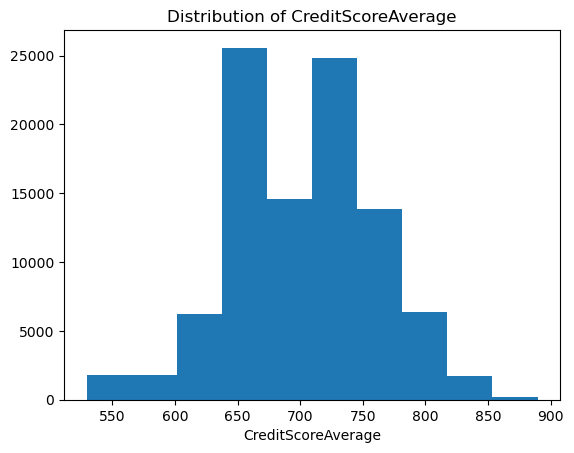

In [32]:
# distribution of the borrower rate (interest rate) in a standard 10 bins

hist_chart('CreditScoreAverage', 10)

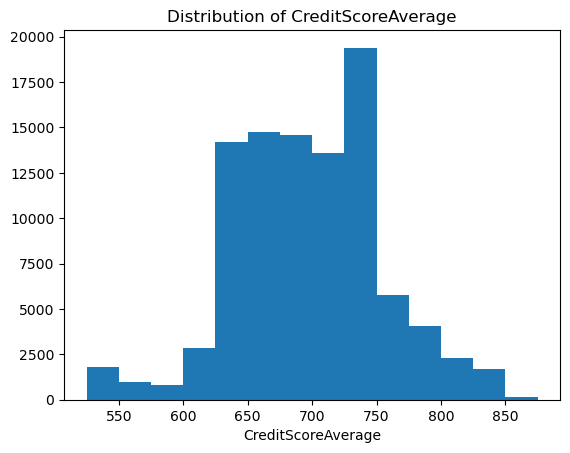

In [33]:
# investigating further on an even smaller bin size

bin_size = np.arange(525, prosper['CreditScoreAverage'].max(), 25)

hist_chart('CreditScoreAverage', bin_size)

The first chart shows the credit score with the highest frequency is around 670 but when i changed the bins size, it is above 700. Overall, the credit scores are between the range of 650 and 750. It seems Prosper demands for a high credit score before borrowers can obtain a loan because the credit score is likely to influence the loan outcome status.

Next, I will look at the loan outcome status.

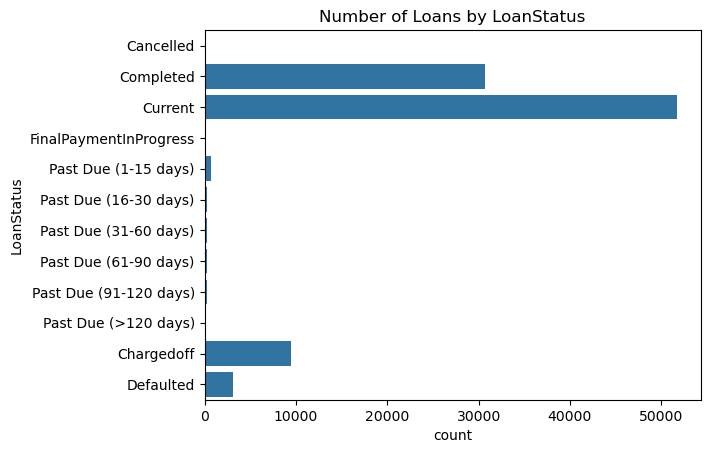

In [34]:
# plot a bar chart for the loan outcome status 

base_color = sb.color_palette()[0]
loan_status = prosper['LoanStatus'].value_counts()

# define the desired order of category
status_order = ['Cancelled', 'Completed', 'Current', 'FinalPaymentInProgress', 
                'Past Due (1-15 days)', 'Past Due (16-30 days)', 'Past Due (31-60 days)', 
                'Past Due (61-90 days)', 'Past Due (91-120 days)', 'Past Due (>120 days)', 
                'Chargedoff', 'Defaulted']

# create a function to plot bar charts to avoid repetition of code
def bar_chart(var, color, order):
    """Returns a horizontal bar chart"""
    sb.countplot(data = prosper, y = var, color=color, order = order);
    plt.title('Number of Loans by {}'.format(var))

bar_chart('LoanStatus', base_color, status_order)

The status of the loans are quite impressive. Most of the loans are still current and just a few of the loans are past due dates.

I will move on to the categorical features that could influence the borrower rate and loan outcome status.

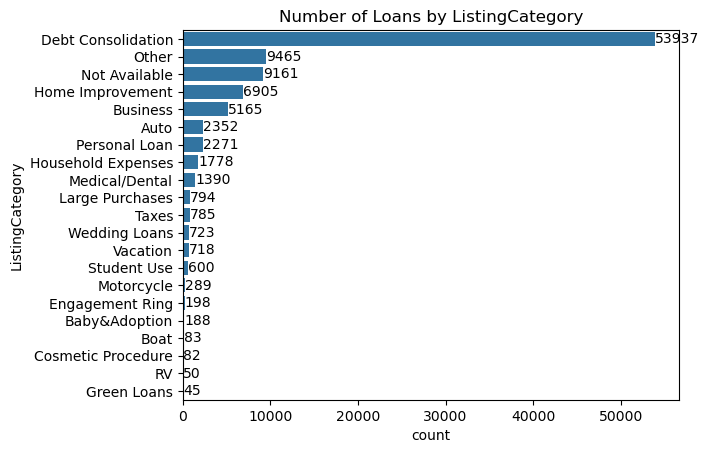

In [35]:
# plot a bar chart for the loan category

category = prosper['ListingCategory'].value_counts()
category_order = category.index
    
bar_chart('ListingCategory', base_color, category_order)

# include data labels in the plot
for i in range(category.shape[0]):
    count = category[i]
    
    plt.text(count, i, count, va = 'center');

The purpose a loan was obtained for may also affect the level of interest applied to the loan. From the chart above, most of the loans were obtained to pay back other loans; Debt consolidation.

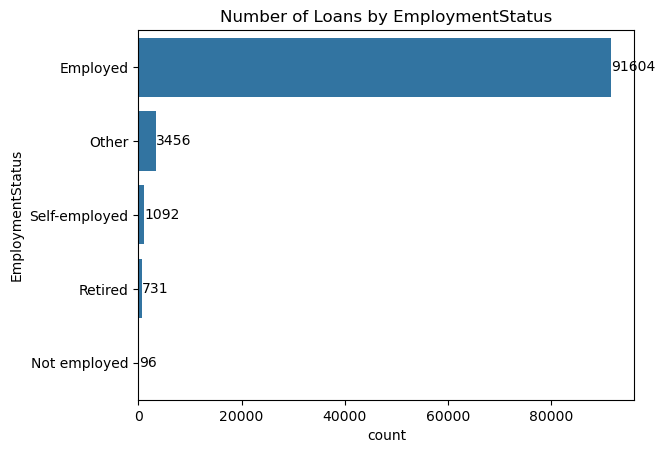

In [36]:
# plot a bar chart for the employment status

empl_status = prosper['EmploymentStatus'].value_counts()
empl_status_order = empl_status.index

bar_chart('EmploymentStatus', base_color, empl_status_order)

# include data labels in the plot
for i in range(empl_status.shape[0]):
    count = empl_status[i]
    
    plt.text(count, i, count, va = 'center');

From the chart above, most of the borrowers are employed and this is likely to affect the borrower rate and loan outcome status.

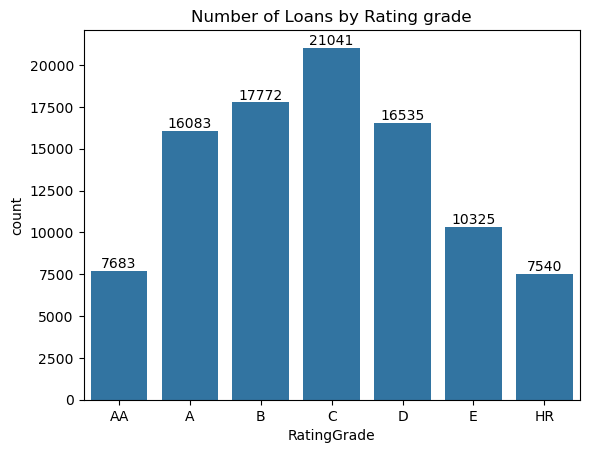

In [37]:
# plot a bar chart for the rating grade

# convert the rating rating column into a categorical datatype and order it because it is ordinal
RatingGrade = ['AA', 'A', 'B', 'C', 'D', 'E', 'HR']
rating_grade = pd.api.types.CategoricalDtype(ordered=True, categories = RatingGrade)
prosper['RatingGrade'] = prosper['RatingGrade'].astype(rating_grade)

ax = sb.countplot(data = prosper, x = 'RatingGrade', color=base_color)
plt.title('Number of Loans by Rating grade')
# include data labels in the plot
ax.bar_label(ax.containers[0], label_type='edge');

AA represents loan with the lowest risk and HR represents loan with the highest risks. Most of the loans have C grade as their level of risk. The riskiness of a loan should influence the level of borrower rate applied to the loan and the loan outcome status.

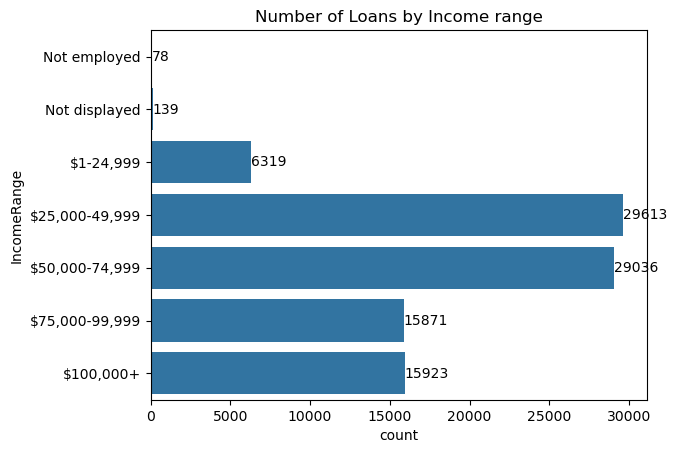

In [38]:
# plot a bar chart for the income class

# convert the income class column into a categorical datatype and order it because it is ordinal
IncomeClasses = ['Not employed', 'Not displayed', '$1-24,999', '$25,000-49,999', 
                  '$50,000-74,999', '$75,000-99,999', '$100,000+']
in_classes = pd.api.types.CategoricalDtype(ordered=True, categories = IncomeClasses)
prosper['IncomeRange'] = prosper['IncomeRange'].astype(in_classes)

ax = sb.countplot(data = prosper, y = 'IncomeRange', color=base_color)
plt.title('Number of Loans by Income range')
# include data labels in the plot
ax.bar_label(ax.containers[0], label_type='edge');

From the chart above, loans are mostly granted to borrowers with yearly income range of $25000 and above

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The interest rate has a bell-shaped distribution. I reduced the bin size to 2% to investigate the distribution of the interest rate further. Although the interest rates are between 5% and 35%, but I discovered Prosper gave out more loans with high borrower rates and the borrower rate with the highest frequency was around 14%

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

When investigating the rating grade and income range variables, I changed the data types of these variables to categorical data types. And I ordered their values because they were ordinal categorical data types. This will make it easy to compare the values of each variables.

### Bivariate Exploration

To start off with, I want to look at the pairwise correlations present between numeric features in the data.

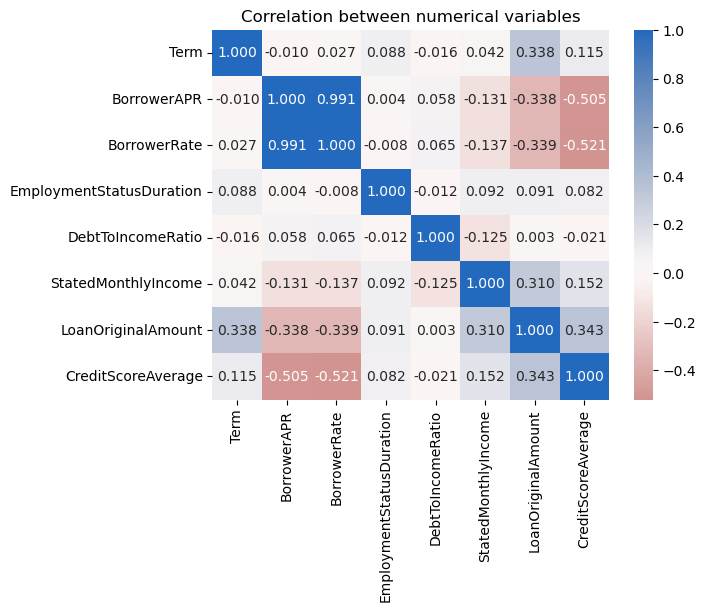

In [39]:
# plot a correlation chart

num_var = ['Term', 'BorrowerAPR','BorrowerRate', 'EmploymentStatusDuration', 
           'DebtToIncomeRatio', 'StatedMonthlyIncome', 'LoanOriginalAmount', 
           'CreditScoreAverage']


sb.heatmap(prosper[num_var].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title('Correlation between numerical variables');

As expected, borrower rate and borrower APR are highly correlated. The positive correlation between term (the loan period) and borrower rate is also expected: the higher the loan period, the higher the interest rate on the loan. And the same concept applies to the positive correlation between the debt to income ratio and the borrower rate.

The negative correlations between employment duration and borrower rate is expected. Stabilty of a borrower's job might affect borrower rate on the loan. The same concept applies to the negative correlation between Monthly income or credit score average and borrower rate.

Suprisingly, loan amount and borrower rate are negatively correlated. I expected a positive correlation: that is, higher loan amounts should have higher borrower rates and lower loan amounts should have lower borrower rate.

Next, I will dig into the relationships between some of the variables in the heatmap and borrower rate using scatter plots.

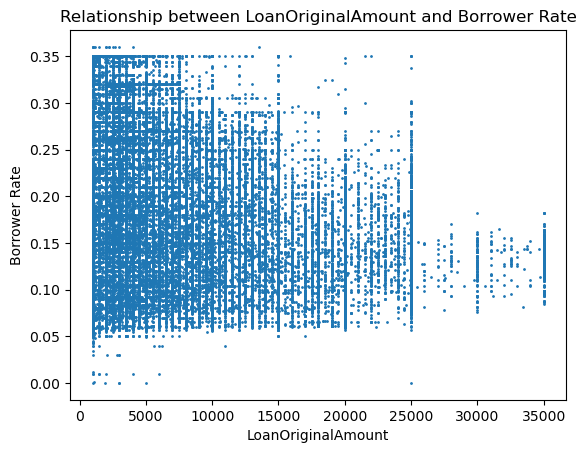

In [40]:
# create a function to plot scatter plot
# add transparency to make it easy to interprete

def scatter_chart(var):
    """Returns a scatter plot"""
    plt.scatter(data=prosper, x = var, y = 'BorrowerRate', s=1)
    plt.xlabel(var)
    plt.ylabel('Borrower Rate')
    plt.title('Relationship between {} and Borrower Rate'.format(var));

# plot the relationship between Loan amount and Borrower rate
scatter_chart('LoanOriginalAmount')

I expected a positive correlation between loan amount and borrower rate. Considering the fact that Prosper mostly gives out loans below 5000 dollars, it is suprising to see a negative relationship between borrower rate and loan amount. Some loans below 10,000 dollars are suprisingly paying higher interest rates while loan amount above 25000 dollars are paying borrower rate below 20%.

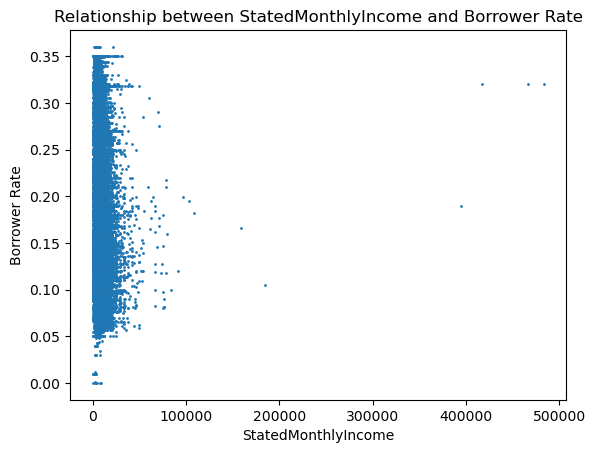

In [41]:
# plot the relationship between Monthly income and Borrower rate

scatter_chart('StatedMonthlyIncome')

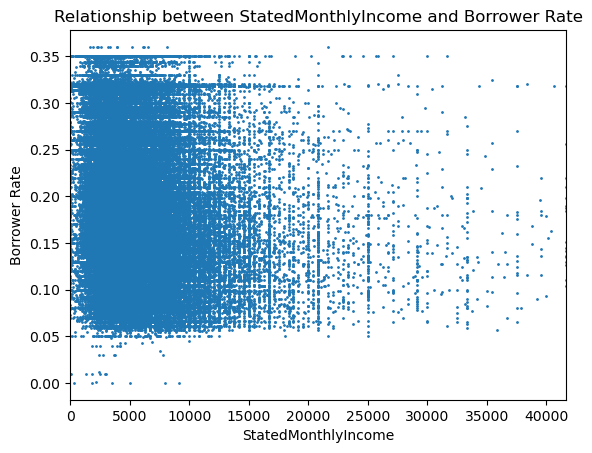

In [42]:
# change the axis limit to make the chart easier to read

scatter_chart('StatedMonthlyIncome')
plt.xlim(0, prosper['StatedMonthlyIncome'].quantile(0.999));

There is a negative relationship between Monthly income and Borrower Rate. The chart suggests most borrowers earn below 100000 dollars. It is not suprising that some borrowers earning below 20,000 pays higher borrower rates compared borrowers earning above 60,000 monthly.

Next, I will look into the relationship between the variable of interest; borrower rate and categorical variables.

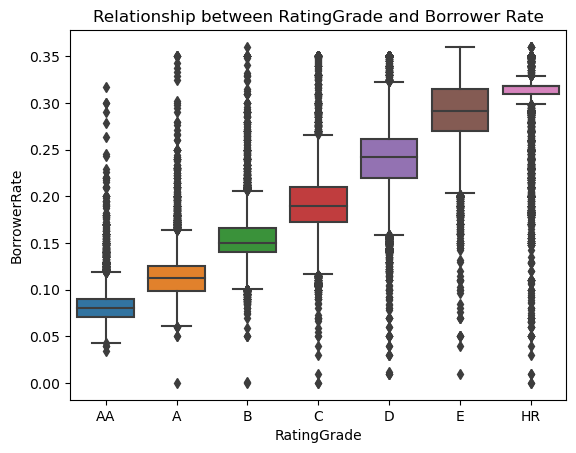

In [43]:
# create a function to plot boxplot

def box_chart(var, orient = "v"):
    """Returns a box plot"""
    if orient == "v":
        kwargs = {"x" : var, "y" : 'BorrowerRate'}
    else:
        kwargs = {"y" : var, "x" : 'BorrowerRate'}
    sb.boxplot(data=prosper, orient = orient, **kwargs)
    plt.title('Relationship between {} and Borrower Rate'.format(var))

#  plot the relationship between Rating grade and Borrower rate
box_chart('RatingGrade', orient = 'v')

There is a positive correlation between Rating grade and Borrower rate as expected. As the grade (riskiness) increases, borrower rate increases on average.

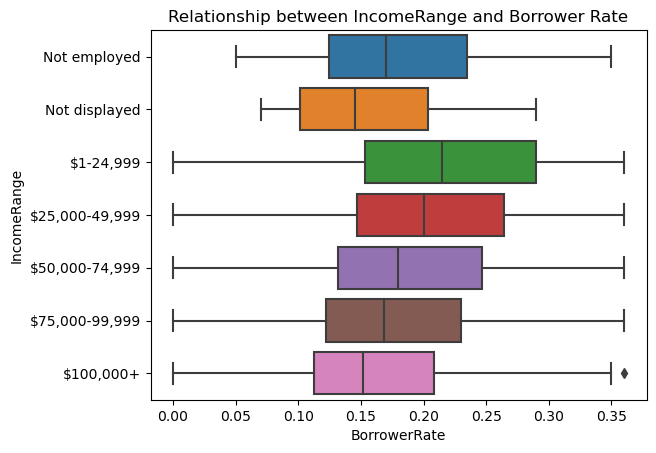

In [44]:
# plot the relationship between Income range and Borrower rate

box_chart('IncomeRange', orient = 'h')

The correlation between the stated yearly income range and borrower rate is negatively correlated as expected. As the income range increases, the average borrower rate decreases. However, it is suprising that unemployed borrowers have lower borrower rate on average compared to other categories.

Next, I will look at factors that affect the loan outcome status.

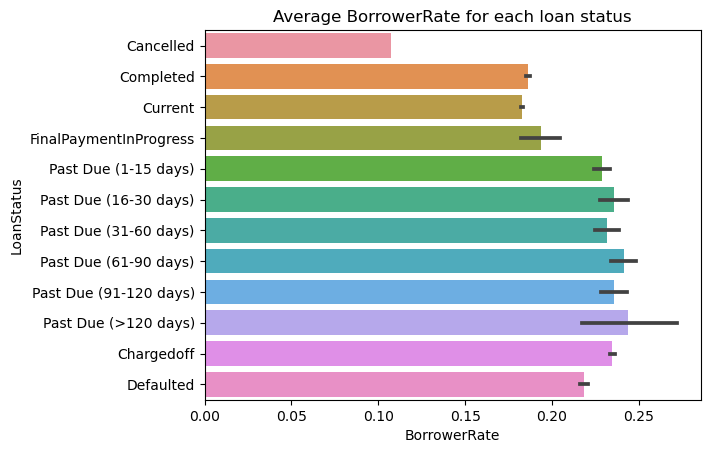

In [45]:
# create a function to plot a bar chart with the mean of a numerical variable on the y axis

def bar_chart2(mean, orient='v'):
    """Returns a bar chart with the mean of a numerical variable"""
    if orient == "v":
        kwargs = {"x" : 'LoanStatus', "y" : mean}
    else:
        kwargs = {"y" : 'LoanStatus', "x" : mean}
    sb.barplot(data = prosper, order = status_order, orient=orient, **kwargs )
    plt.title('Average {} for each loan status'.format(mean));

bar_chart2('BorrowerRate', orient='h')

Interestingly, loans that are current and completed have lower borrower rates on average while loan past due dates have higher borrower rates on average.

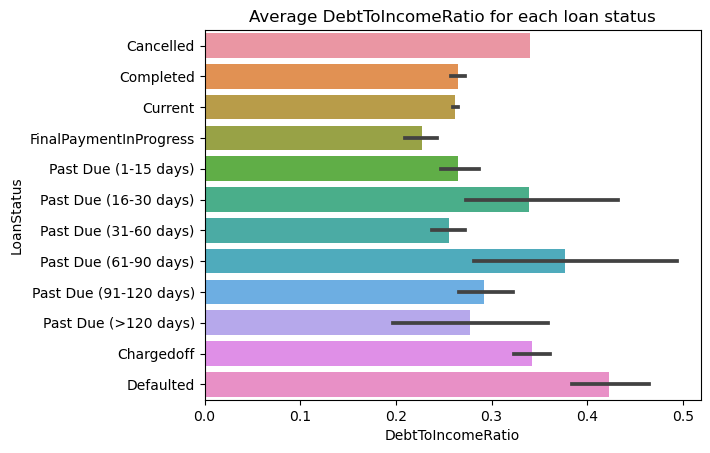

In [46]:
bar_chart2('DebtToIncomeRatio', orient='h')

As expected, completed, current and final payment in progress loans have lower debt to income ratio on average compared to loans that are charged off, defaulted and above 60 days past due.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

Borrower rate varies positively with term and debt to income ratio variables. It varies negatively with the monthly income, credit score and employment duration variables as expected. But suprisingly, the borrower rate varies negatively with the loan amount. However, these correlations are low because they are very close to 0. Only borrower credit score, loan amount and APR have a higher level of correlation with the borrower rate. The borrower rate also varies positively with the rating grade of loan and negatively with the income range of borrowers.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

Expected relationship were found between loan status, borrower rate and debt to income ratio features. Loans that are current, completed and final payment in progress have lower borrower rates and lower debt to income ratio on average compared to loans that are charged off and past due dates.


## Multivariate Exploration

Here, I want explore why borrower rate and loan amount are negatively correlated. I expected a positive correlation.

First, is being a home owner the reason for a lower rate despite a higher loan amount?

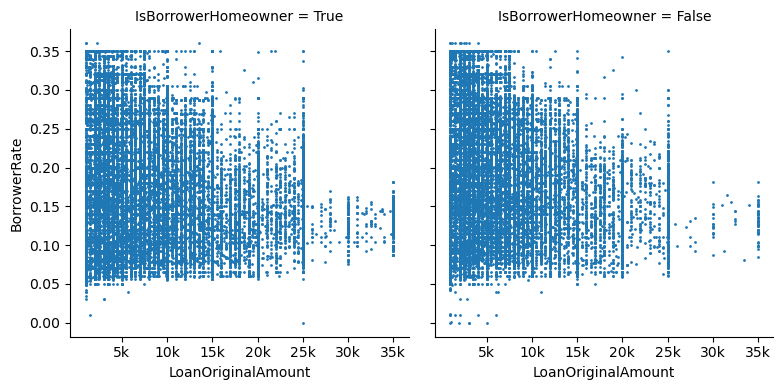

In [47]:
# plot the relationship between Loan amount and Borrower rate and facet by homeowner 

g = sb.FacetGrid(data = prosper, col = 'IsBorrowerHomeowner', col_order= [True, False], height=4)
g.map(plt.scatter, 'LoanOriginalAmount', 'BorrowerRate', s=1)

# change the x axis labels to make it easy to read
x_tick = [5000, 10000, 15000, 20000, 25000, 30000, 35000]
x_ticks = ['5k', '10k', '15k', '20k', '25k', '30k', '35k']
g.set(xticks=x_tick, xticklabels = x_ticks);

The charts still show a negative correlation after faceting by homeowner. This means the negative correlation is not affected by being a homeowner. Some borrowers with lower loan amount paid higher interest despite having homes.

Next, is the income size the reason for a lower borrower rate despite a higher loan amount?

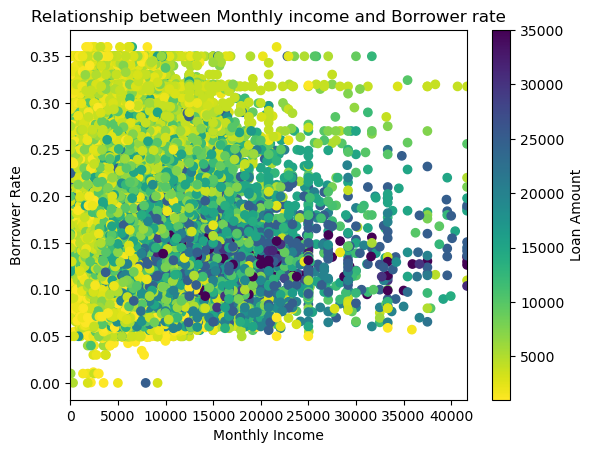

In [48]:
# plot the relationship between Monthly income and Borrower rate by Loan amount

plt.scatter(data = prosper, x = 'StatedMonthlyIncome', y = 'BorrowerRate', 
            c = 'LoanOriginalAmount', cmap = 'viridis_r')
plt.colorbar(label = 'Loan Amount')
plt.xlabel('Monthly Income')
plt.ylabel('Borrower Rate')
plt.title('Relationship between Monthly income and Borrower rate')

# change the x axis limit to reduce the data and make the plot easy to read
plt.xlim(0, prosper['StatedMonthlyIncome'].quantile(0.999));

The chart shows a low monthly income below 10,000 might be the reason borrowers of lower loan amounts (below 15000) are paying higher borrower rates. Most of the borrowers earning above 10000 monthly and borrowing above 15000 paid below 25% as borrower rate.

Next, is rating grade the reason for a higher borrower rate despite a lower loan amount?

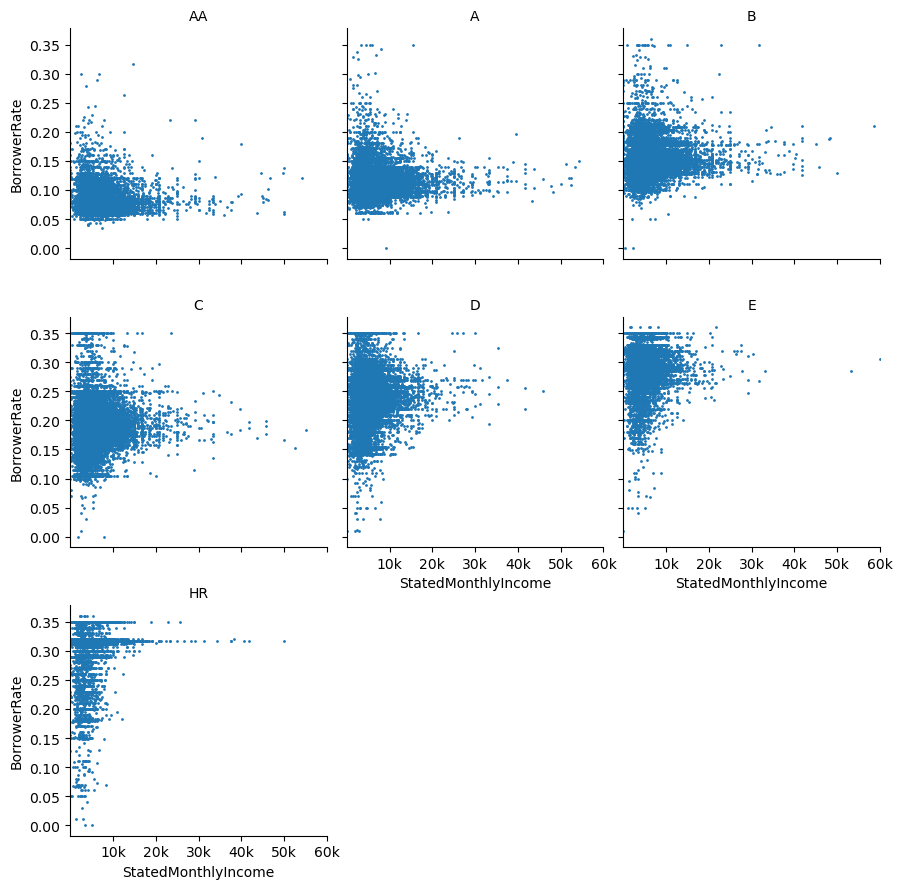

In [49]:
# plot the relationship between Monthly income and Borrower rate and facet by grade

g = sb.FacetGrid(data = prosper, col = 'RatingGrade', col_wrap=3, height= 3)
g.map(plt.scatter, 'StatedMonthlyIncome', 'BorrowerRate', s=1)
g.set(xlim=(0, 60000))
g.set_titles('{col_name}')

# change the x axis labels to make it easy to read
x_tick = [10000, 20000, 30000, 40000, 50000, 60000]
x_ticks = ['10k', '20k', '30k', '40k', '50k', '60k']
g.set(xticks=x_tick, xticklabels = x_ticks);

Rating Grade attached to loans might be the reason for the negative correlation between loan amount and borrower rate. Initially, I discovered a negative correlation between monthly incomes and borrower rates. From the charts above, the negative correlation is still true for loans with lower risks (lower grade: AA, A, and B), but it becomes positive correlation as the risk increased. That is, for higher risk loans (C, D, E, HR) the borrower rate increases irrespective of the monthly income.

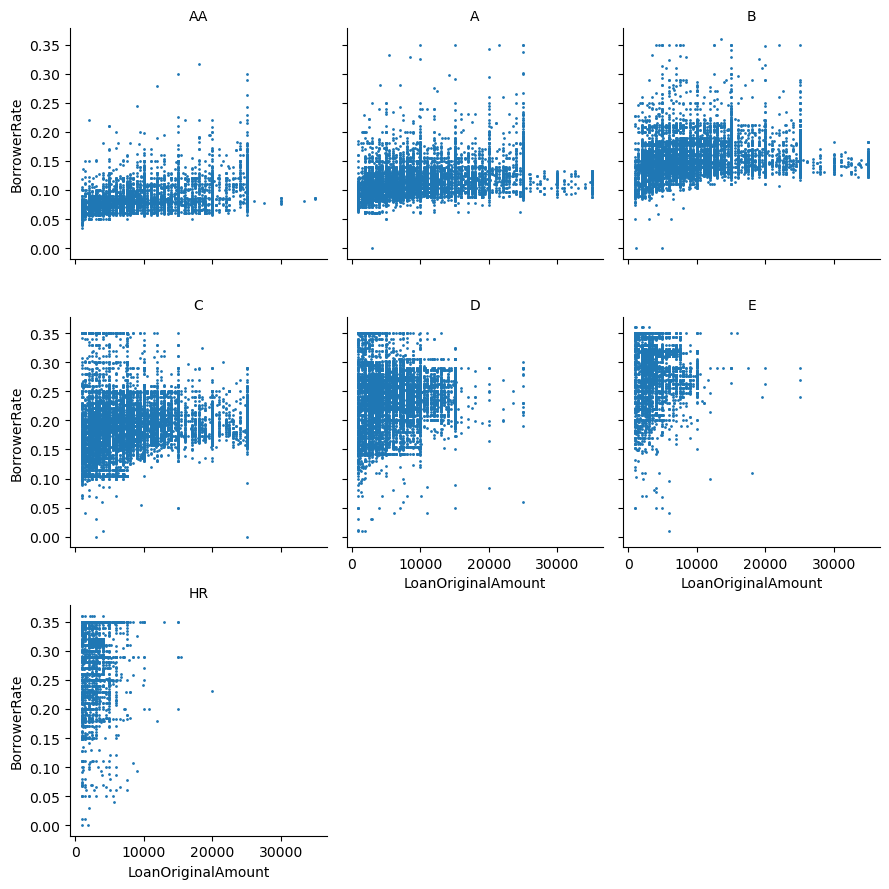

In [50]:
# plot the relationship between Loan amount and Borrower rate and facet by grade

g = sb.FacetGrid(data = prosper, col = 'RatingGrade', col_wrap=3, height= 3)
g.map(plt.scatter, 'LoanOriginalAmount', 'BorrowerRate', s=1)
g.set_titles('{col_name}');

The reason for the negative correlation between loan amount and borrower rate seems obvious here. From grade C to HR, the borrower rates were high for most of the loan amounts below 10000.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

I extended my investigation in this section to find out the reasons for the negative correlation between loan amount and borrower rate. The investigation shows that the borrower being an home owner does not influence the borrower rate applied to the loan. It also shows that borrowers with lower monthly income and low loan amount tend to pay a higher borrower rates.

### Were there any interesting or surprising interactions between features?

Rating Grade (risks attached to a loan) seems to be the main indicator of borrower rate. As borrower loan risk increases, the borrower rate increases, irrespective of the level of income. The negative correlation between monthly income and borrower rate only applies to the loan with low rating grade (low risk - AA, A, B).

## Conclusions
This data set contains 113,937 loans with 81 variables on each loan. Preliminary data wrangling performed before I started the exploration are as follows:

1. Select variables of interest
2. Change data types 
3. Fill null values 
4. Rename columns
5. Delete extraneous columns
6. Convert numerical values to alphabetical values
7. Remove null values and
8. Remove duplicate rows

### Findings
1. The loan borrower rate is between 5% and 35% and the rate with the highest frequency is around 14%.
2. Prosper gives out mostly loans below 5000 and requires credit score between 650 and 750.
3. Most of the loans are current, completed and C credit grade. And loans were mostly obtained to pay back other loans.
4. Majority of the borrowers are employed and have a yearly income range above 25000.
5. The borrower rate varies postively with the rating grade, term of loan, and debt to income ratio.
6. The borrower rate varies negatively with the monthly income, employment duration, credit score and suprisingly loan amount.
7. Current, completed and final payment loans status have lower borrower rates and lower debt to income ratios on average compared to loan charged off or past due dates.
8. Rating grade applied to a loan seems to be the main indicator of the borrower rate.

### Limitations
Nonetheless, these findings must be interpreted with caution and a number of limitations should be borne in mind:
1. The dataset is not current.
2. The dataset has 81 variables. I carried out these exploration with 15 variables I was interested in.
3. The null values deleted might have been investigated and filled with the correct values.